# EDA and CASE File Generation

The purpose of ths notebook is to generate a daily case file for COVID-19. The source data is fetched from **data.gov** which is a trusted resource for local and Federal government open data. A data dictionary is available at an alternative source, **Open City Open Data** at *https://data.cityofnewyork.us/Health/COVID-19-Daily-Counts-of-Cases-Hospitalizations-an/rc75-m7u3/about_data*. 

For our purposes, we will only be interested in the date and the count per day. Nevertheless, I will be doing some exploratory analysis on the data source to see if anything can be learned about the data before exporting a cleaned and refined version of the data saource.

In [11]:
import pandas as pd 

In [12]:
import requests as req
import os

if not os.path.exists('../data/daily_countof_cases.csv'):
    url = "https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv"

    # let's fetch the data
    response = req.get(url)

    if response.ok:
        with open('../data/daily_count_of_cases.csv', mode='wt+') as file:
            file.write(response.text)


In [13]:
# import the daily case file for processing
df = pd.read_csv('../data/daily_count_of_cases.csv')
df.head()


,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,...,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Let's get a list of the columns
df.columns

Index(['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'CASE_COUNT_7DAY_AVG',
       'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG', 'BX_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT',
       'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT', 'BX_CASE_COUNT_7DAY_AVG',
       'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG',
       'BX_HOSPITALIZED_COUNT_7DAY_AVG', 'BX_DEATH_COUNT_7DAY_AVG',
       'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT',
       'BK_DEATH_COUNT', 'BK_CASE_COUNT_7DAY_AVG',
       'BK_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG',
       'BK_HOSPITALIZED_COUNT_7DAY_AVG', 'BK_DEATH_COUNT_7DAY_AVG',
       'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT',
       'MN_DEATH_COUNT', 'MN_CASE_COUNT_7DAY_AVG',
       'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_ALL_CASE_COUNT_7DAY_AVG',
       'MN_HOSPITALIZED_COUNT_7DAY_AVG', 'MN_DEATH_COUNT_7

The data file has a total of 55 columns. However, according to the data dictionary provied at **NYC Open Data** only 4
 of these columns provide a complete description of what they represent on the website.  After further investigation, it was discovered that the prefixes represent the 5 boroughs of NY and as a result provides more detailed information about selected areas across the city. The prefixes are explained as follows:

 |Prefix|Meaning|
 |------|-------|
 | BX   | Bronx |
 | BK   | Brooklyn  |
 | MN   | Manhattan  |
 | QN   | Queens  |
 | SI   | Staten Island  |

 Source: *https://data.cityofnewyork.us/api/views/rc75-m7u3/files/3b17435e-29fc-4328-b8d2-702304107935?download=true&filename=COVID19_CaseHospDeath_UserGuide_20201202.docx*

 For this study, only the first four described fields are used - <u>*date_of_interest, case_count, hospitalized_count, death_count, and incomplete*</u> will be retained for further analysis. These fields represent the aggregate of all data collected across all five boroughs.

In [15]:
working_df = df[['date_of_interest', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'INCOMPLETE']]
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_of_interest    2054 non-null   object
 1   CASE_COUNT          2054 non-null   int64 
 2   HOSPITALIZED_COUNT  2054 non-null   int64 
 3   DEATH_COUNT         2054 non-null   int64 
 4   INCOMPLETE          2054 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 80.4+ KB


There are 2054 entries in the dataset and each ofthe columns indicate there are 2054 entries. There is <u>no missing data</u>.

## General Descriptive Statistics

In [16]:
working_df.describe()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,INCOMPLETE
count,2054.000000,2054.000000,2054.000000,2054.000000
mean,1482.950341,110.894839,22.954236,207.989289
std,3813.065013,194.040185,75.237910,3557.595909
min,0.000000,0.000000,0.000000,0.000000
25%,223.000000,27.000000,2.000000,0.000000
50%,517.000000,52.000000,5.000000,0.000000
75%,1627.750000,115.750000,14.750000,0.000000
max,55058.000000,1858.000000,832.000000,61030.000000


In comparing the results, I noticed that the maximum case count in any one day for all the NYC hospitals in this study is 55,508 confirmed cases. However, the number hospitalized does not match that. This may be explained by the fact that most patients did not require hospitalization. Instead, quarantining was the preferred method of handling COVID cases. This allowed the body to fight of the respiratory disease naturally, without hospitalization. Hospitalization was only used for people who fell into the most vulnerable bracket.

All the features illustrate a larger mean than the 50th percentile value. This clearly indicates a skew to the right suggesting that all features included outliers that affected the average. Therefore there were some days where there was an unexpected surge in the confirmed infections, hospitalizations and deaths.

The incomplete column does not provide a description of what it means. Consequently, it is not clear as to how to interpret the maximumn of 61,030 records that is listed as incomplete. This may have been relevant with the additional fields but it is not clear what it represents within this context and wil be removed.

## Scaling the data

To better represent the data in charts and graphs, I will perform some scaling - normailzation and standardization of the data.

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Normalization

In [18]:
def normalizeDF(tdf, features):
    # create the scaler
    scaler = MinMaxScaler()
    
    # create a list of the normalized feature names
    norm_features = []
    for feature in features:
        feature_name = 'norm_' + feature
        
        norm_features.append(feature_name.lower());
        
    # normalize the features
    tdf.loc[:, norm_features] = scaler.fit_transform(tdf[features])

    # return the dataframe
    return tdf

In [19]:
feature_columns = ['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']

In [20]:
working_df  = normalizeDF(working_df, feature_columns)

In [21]:
working_df.head()

,date_of_interest,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,INCOMPLETE,norm_case_count,norm_hospitalized_count,norm_death_count
0,02/29/2020,1,1,0,0,0.000018,0.000538,0.0
1,03/01/2020,0,1,0,0,0.000000,0.000538,0.0
2,03/02/2020,0,2,0,0,0.000000,0.001076,0.0
3,03/03/2020,1,7,0,0,0.000018,0.003767,0.0
4,03/04/2020,5,2,0,0,0.000091,0.001076,0.0


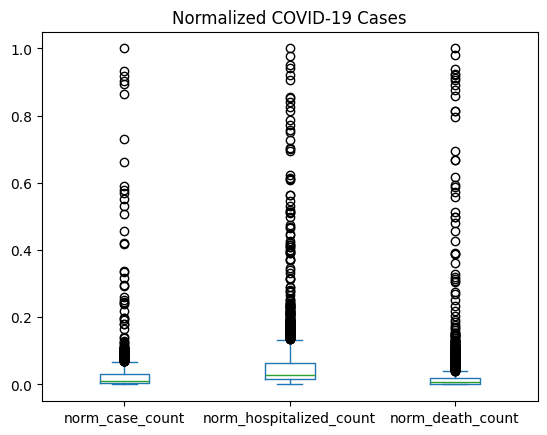

In [22]:
working_df[['norm_case_count', 'norm_hospitalized_count', 'norm_death_count']].plot(kind='box', title='Normalized COVID-19 Cases')
plt.show()

### Standardization

In [23]:
def standardizeDF(tdf, features):
    # create the scaler
    scaler = StandardScaler()

    # create the list of standardized feature names
    std_features = []
    for feature in features:
        
        feature_name = 'std_' + feature
        std_features.append(feature_name.lower())

    # scale the features
    tdf.loc[:,std_features] = scaler.fit_transform(tdf[features])

    return tdf

        

In [24]:
working_df = standardizeDF(working_df, feature_columns)

In [25]:
working_df.head()

,date_of_interest,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,INCOMPLETE,norm_case_count,norm_hospitalized_count,norm_death_count,std_case_count,std_hospitalized_count,std_death_count
0,02/29/2020,1,1,0,0,0.000018,0.000538,0.0,-0.388745,-0.566489,-0.305163
1,03/01/2020,0,1,0,0,0.000000,0.000538,0.0,-0.389008,-0.566489,-0.305163
2,03/02/2020,0,2,0,0,0.000000,0.001076,0.0,-0.389008,-0.561334,-0.305163
3,03/03/2020,1,7,0,0,0.000018,0.003767,0.0,-0.388745,-0.535560,-0.305163
4,03/04/2020,5,2,0,0,0.000091,0.001076,0.0,-0.387696,-0.561334,-0.305163


<Axes: title={'center': 'Standardized COVID-19 cases'}>

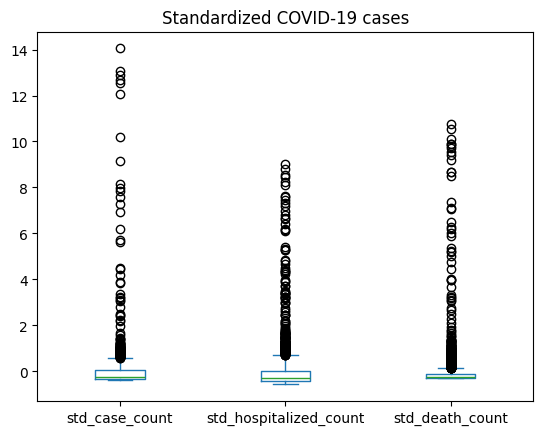

In [26]:
working_df[['std_case_count', 'std_hospitalized_count', 'std_death_count']].plot(kind='box', title='Standardized COVID-19 cases')

## Histogram

I will draw up some histograms to illustrate the statistical distributions.

<Axes: title={'center': 'Distribution of daily COVID cases'}, ylabel='Frequency'>

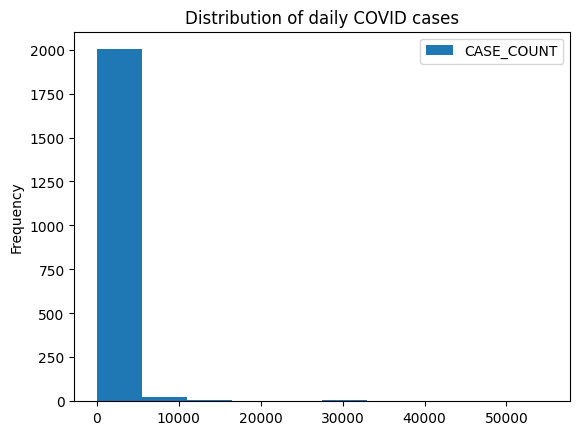

In [27]:
working_df[['CASE_COUNT']].plot(kind='hist', title='Distribution of daily COVID cases')

<Axes: title={'center': 'Distribution of daily HOSPITALIZATION cases'}, ylabel='Frequency'>

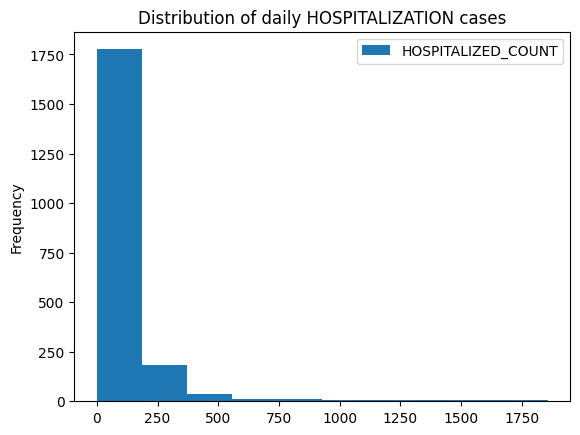

In [28]:
working_df[['HOSPITALIZED_COUNT']].plot(kind='hist', title='Distribution of daily HOSPITALIZATION cases')

<Axes: title={'center': 'Distribution of daily DEATH cases'}, ylabel='Frequency'>

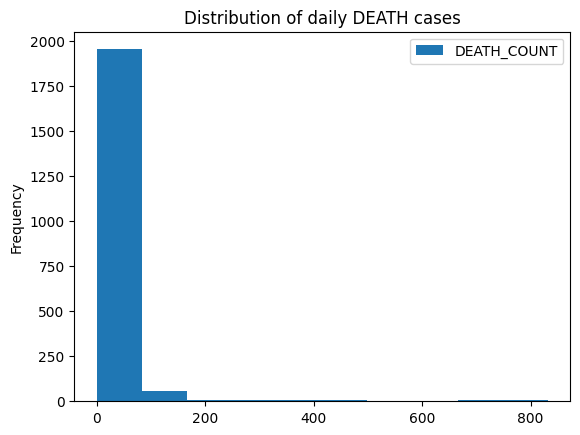

In [29]:
working_df[['DEATH_COUNT']].plot(kind='hist', title='Distribution of daily DEATH cases')

## Group Data

The data is collected on a daily-basis. Therefore, it is difficult to visualize this content because of the number of intervals. However, grouping the data by month will make it easier to group.

In [30]:
# create year field
working_df.loc[:, 'year'] = working_df['date_of_interest'].apply( lambda x: x[-4:])

# create month field
working_df.loc[:, 'month'] = working_df['date_of_interest'].apply( lambda x: x[0:2])

/tmp/ipykernel_13954/1818465323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df.loc[:, 'year'] = working_df['date_of_interest'].apply( lambda x: x[-4:])
/tmp/ipykernel_13954/1818465323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df.loc[:, 'month'] = working_df['date_of_interest'].apply( lambda x: x[0:2])


In [31]:
working_df.head()

,date_of_interest,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,INCOMPLETE,norm_case_count,norm_hospitalized_count,norm_death_count,std_case_count,std_hospitalized_count,std_death_count,year,month
0,02/29/2020,1,1,0,0,0.000018,0.000538,0.0,-0.388745,-0.566489,-0.305163,2020,02
1,03/01/2020,0,1,0,0,0.000000,0.000538,0.0,-0.389008,-0.566489,-0.305163,2020,03
2,03/02/2020,0,2,0,0,0.000000,0.001076,0.0,-0.389008,-0.561334,-0.305163,2020,03
3,03/03/2020,1,7,0,0,0.000018,0.003767,0.0,-0.388745,-0.535560,-0.305163,2020,03
4,03/04/2020,5,2,0,0,0.000091,0.001076,0.0,-0.387696,-0.561334,-0.305163,2020,03


<Axes: title={'center': 'COVID cases over time'}, xlabel='year'>

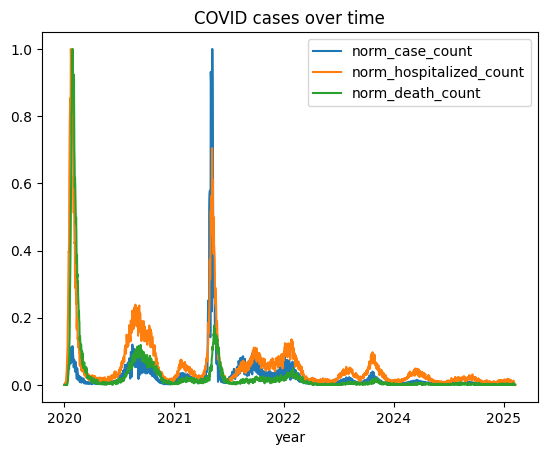

In [32]:
working_df.plot(kind="line", title="COVID cases over time", x="year", y=['norm_case_count', 'norm_hospitalized_count', 'norm_death_count'])

Although each of the features had different values per day, the increases and decreases closely mirrored each other. As confirmed cases increased, so did hospitalizations and deaths. However, somewhere around 2022, the number of hospitalizations surpasses the number of confirmed cases. According to the data dictionary's definition of the hospitalized count, Count of COVID-19 patients who were hospitalized on date_of_interest, patients who stayed in the hospital over a number of days were counted on each day they were present. 

## Organize data by year and month

In [33]:
working_aggr_df = working_df[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'year', 'month']].groupby(by=['year', 'month'], axis=0, as_index=False).sum()

/tmp/ipykernel_13954/2027546707.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  working_aggr_df = working_df[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'year', 'month']].groupby(by=['year', 'month'], axis=0, as_index=False).sum()


In [34]:
working_aggr_df.head(12)

,year,month,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,2020,02,1,1,0
1,2020,03,65179,18536,2638
2,2020,04,109292,27868,16689
3,2020,05,28412,3945,3267
4,2020,06,10845,1534,749
5,2020,07,9793,1155,277
6,2020,08,7446,958,134
7,2020,09,11096,927,127
8,2020,10,16926,1567,173
9,2020,11,44764,3235,349


In [35]:
working_aggr_df = normalizeDF(working_aggr_df, feature_columns)

In [36]:
working_aggr_df.head(12)

,year,month,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,norm_case_count,norm_hospitalized_count,norm_death_count
0,2020,02,1,1,0,0.000000,0.000000,0.000000
1,2020,03,65179,18536,2638,0.128659,0.665124,0.158068
2,2020,04,109292,27868,16689,0.215737,1.000000,1.000000
3,2020,05,28412,3945,3267,0.056082,0.141529,0.195758
4,2020,06,10845,1534,749,0.021406,0.055011,0.044880
5,2020,07,9793,1155,277,0.019329,0.041411,0.016598
6,2020,08,7446,958,134,0.014696,0.034342,0.008029
7,2020,09,11096,927,127,0.021901,0.033229,0.007610
8,2020,10,16926,1567,173,0.033409,0.056196,0.010366
9,2020,11,44764,3235,349,0.088361,0.116051,0.020912


Now the data has been reorganized by month, it is worth revisiting the earlier EDA to observe the spread of the data.

### Box and whiskers

<Axes: title={'center': 'Normalized COVID-19 Cases'}>

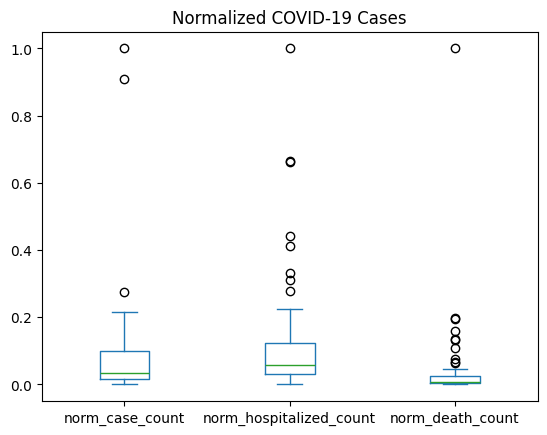

In [37]:
working_aggr_df[['norm_case_count', 'norm_hospitalized_count', 'norm_death_count']].plot(kind="box", title="Normalized COVID-19 Cases")

This result is a lot easier to read than the first. It is clearer now that although the case count was higher than the hospitalized count, the hospitalized count had more outliers resulting in a skewed result. So what can be detailed about this is that there were a lot more situations where there were sudden increases in the number of people bieng hospitalized.

### Histogram

<Axes: title={'center': 'Distribution of Monthly Case Count'}, ylabel='Frequency'>

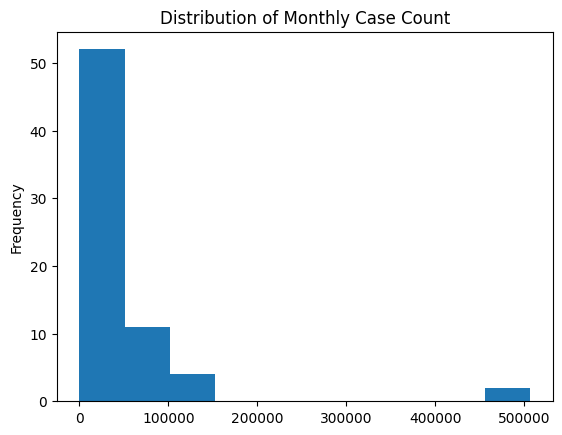

In [38]:
working_aggr_df['CASE_COUNT'].plot(kind="hist", title="Distribution of Monthly Case Count")

<Axes: title={'center': 'Distribution of Monthly Hospitalized Count'}, ylabel='Frequency'>

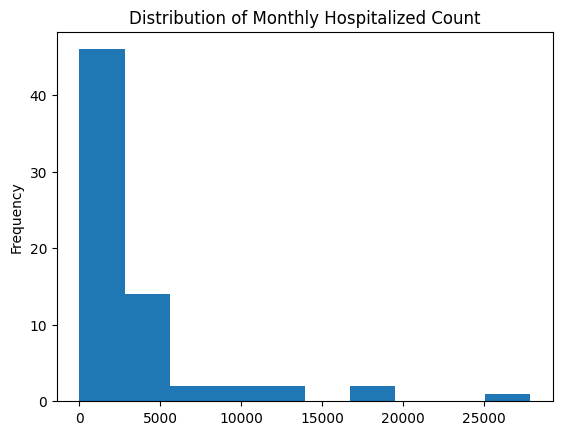

In [39]:
working_aggr_df['HOSPITALIZED_COUNT'].plot(kind="hist", title="Distribution of Monthly Hospitalized Count")

It is a lot more apparent in this histogram that the hospital data has a lot more bins of data than either the number of cases and death counts. This reinforces the observation in the box and whiskers diagram that there were a lot more outliers in this category than either two.

<Axes: title={'center': 'Distribution of Monthly Death Count'}, ylabel='Frequency'>

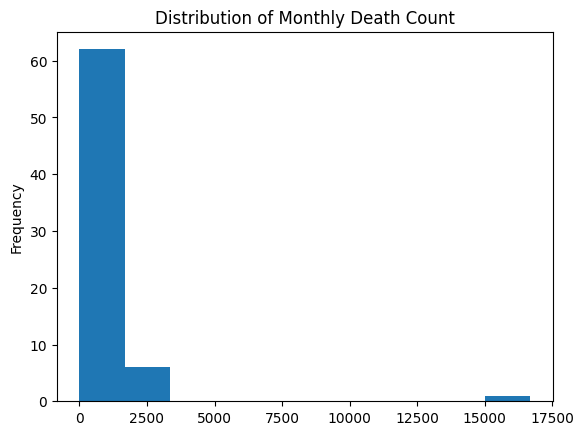

In [40]:
working_aggr_df['DEATH_COUNT'].plot(kind="hist", title="Distribution of Monthly Death Count")

### Line Graph

<Axes: title={'center': 'COVID cases over time'}, xlabel='year'>

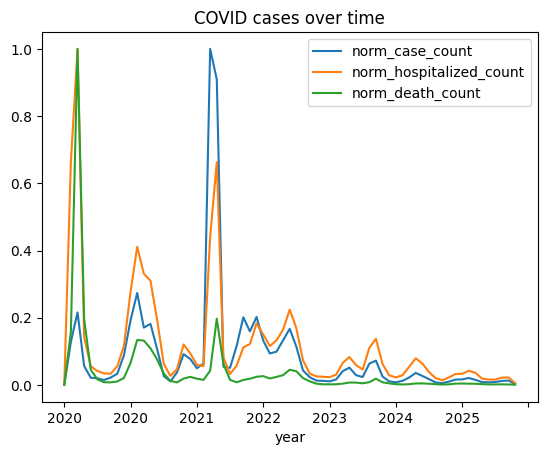

In [41]:
working_aggr_df.plot(kind="line", title="COVID cases over time", x="year", y=['norm_case_count', 'norm_hospitalized_count', 'norm_death_count'])

## Average analysis.

One of the other pieces of data that is avaialbele to us is the average daily counts. This provides a much smoother, day-to-day count of the number of cases, hospitalized, and deaths. I will visualize the same data using these averages.

In [45]:
working_avg_df = df[['date_of_interest', 'CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG']]

### Box and whiskers

<Axes: title={'center': 'COVID CASES'}>

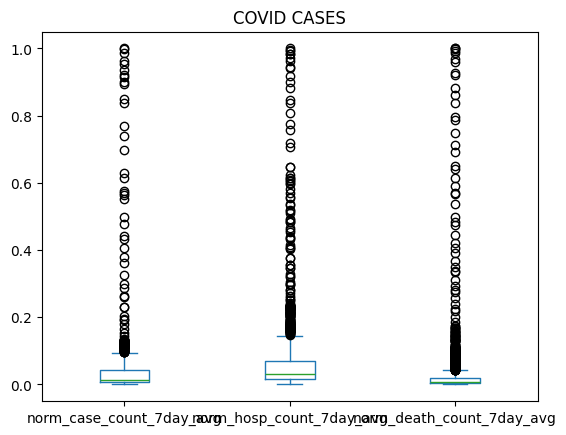

In [ ]:
working_avg_df[['norm_case_count_7day_avg', 'norm_hosp_count_7day_avg', 'norm_death_count_7day_avg']].plot(kind="box", title="COVID CASES")

### Histograms

In [46]:
feature_columns = ['CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG']
working_avg_df = normalizeDF(working_avg_df, feature_columns )

<Axes: title={'center': 'COVID CASE COUNT 7day AVG'}, ylabel='Frequency'>

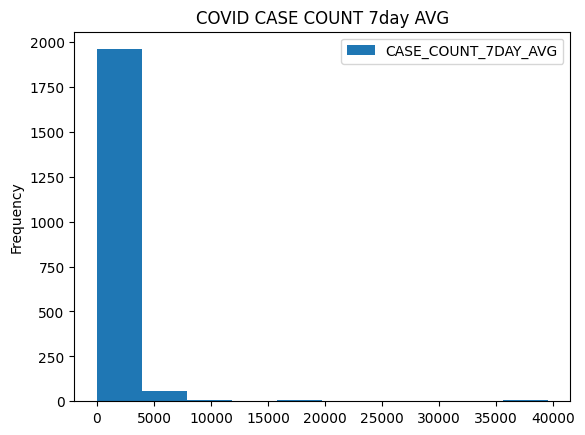

In [50]:
working_avg_df[['CASE_COUNT_7DAY_AVG']].plot(kind="hist", title="COVID CASE COUNT 7day AVG")

<Axes: title={'center': 'COVID HOSPITALIZED COUNT 7day AVG'}, ylabel='Frequency'>

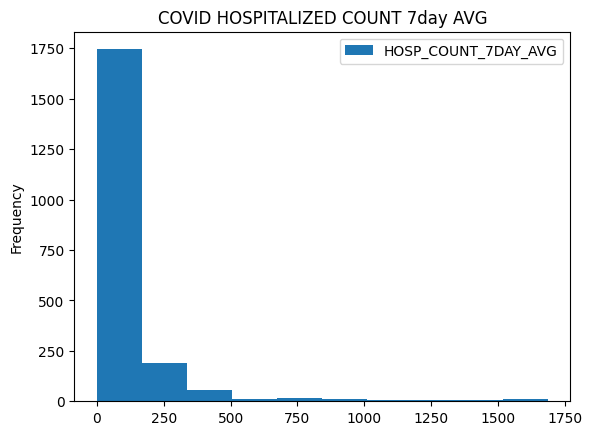

In [51]:
working_avg_df[['HOSP_COUNT_7DAY_AVG']].plot(kind="hist", title="COVID HOSPITALIZED COUNT 7day AVG")

<Axes: title={'center': 'COVID DEATH COUNT 7day AVG'}, ylabel='Frequency'>

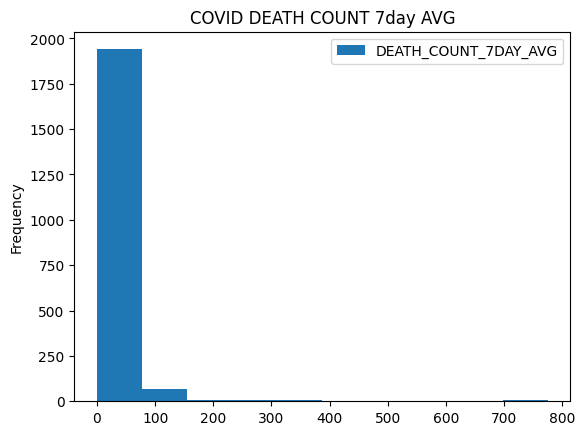

In [52]:
working_avg_df[['DEATH_COUNT_7DAY_AVG']].plot(kind="hist", title="COVID DEATH COUNT 7day AVG")

In spite of using the averaegs, the overall shapes formed by the histogram do not appear all that different from the raw counts done in the first part of the notebook. Given this finding, I don't expect a line graph to be much different than the original raw count.